Принятие решений в бизнесе

# Описание проекта

Отдел аналитики интернет-магазина совместно с отделом маркетинга подготовили список гипотез для увеличения выручки. Надо приоритизироват гипотезы, запустить A/B-тест и проанализировать результаты.

# Часть 1. Приоритизацияя гипотез

## Выгружаем данные.

In [8]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [9]:
hypothesis = pd.read_csv('hypothesis.csv', sep=',')

In [10]:
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [11]:
hypothesis.head(2)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10


- Hypothesis ;
- Reach ;
- Impact ;
- Confidence ;
- Efforts .

In [12]:
print("Гипотезы:")

pd.options.display.max_colwidth = 150
hypothesis['hypothesis']

Гипотезы:


0              Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
1                                       Запустить собственную службу доставки, что сократит срок доставки заказов
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3             Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4                                Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
5                        Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
6            Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
7                Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
8                                                         Запустить акцию, дающую скидку

Применяем фреймворк ICE для приоритизации гипотез

In [13]:
hypothesis['ICE'] = (hypothesis['impact'] *
              hypothesis['confidence'] /
              hypothesis['efforts']).astype(int)
hypothesis_ice = hypothesis.sort_values(by='ICE', ascending=False).reset_index()

In [14]:
hypothesis_ice.head(3).drop(labels='index', axis=1)

,hypothesis,reach,impact,confidence,efforts,ICE
0,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11


In [15]:
hypothesis_ice['hypothesis'][0]

'Запустить акцию, дающую скидку на товар в день рождения'

Применяем фреймворк RICE для приоритизации гипотез

In [16]:
hypothesis['RICE'] = (hypothesis['reach'] *
               hypothesis['impact'] *
               hypothesis['confidence'] /
               hypothesis['efforts']).astype(int)
hypothesis_rice = hypothesis.sort_values(by='RICE', ascending=False).reset_index()

In [17]:
hypothesis_rice.head(3).drop(labels='index', axis=1)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11,112
1,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7,56
2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13,40


In [18]:
hypothesis_rice['hypothesis'][0]

'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'

Выводы

При применении фреймворка ICE приоритетной гипотезой оказалась гипотеза о скидке на день рождения. При применении RICE на первом месте находится гипотеза о форме подписки на email-рассылки. Различия в приоритетах обусловлены тем, что во фреймворке ICE не учитывается параметр охвата пользователей, которых затронет изменение. Поэтому из таблицы видно, что параметр reach у приоритетной гипотезы ICE равен 1. Возможно, это объясняется тем, что только небольшое количество пользователей готовы предоставить свои личные данные. В случае RICE параметр количества пользователей значительно влияет на итоговое число, поскольку данное изменение скорее всего охватит всех пользователей.

# Часть 2. Анализ A/B-теста

## Выгружаем данные

In [21]:
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

In [22]:
display(orders.info())
display(orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

0

In [23]:
display(visitors.info())
display(visitors.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

0

In [24]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


- transactionId ;
- visitorId ;
- date ;
- revenue ;
- group .

In [25]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


- date ;
- group ;
- visitors .

Проверим пересечения пользователей по группам

In [26]:
orders_visitors = orders.groupby('visitorId').agg({'group': 'nunique'})
orders_visitors.columns = ['groups_number']
orders_visitors[orders_visitors['groups_number'] > 1].count()

groups_number    58
dtype: int64

In [27]:
orders.groupby('group').agg({'visitorId': 'nunique'})

,visitorId
group,
A,503
B,586


Небольшое количество пользователей пересекается по группам (около 5%). Это может происходить из-за того, что пользователи заходят с разных устройств.

Пропуски и дубликаты отсутствуют, данные приведены к правильным типам и готовы к дальнейшему анализу

# Проанализируем A/B тест

Построим график коммулятивной выручки по группам

In [28]:
# массив уникальных пар значений дат и групп
datesGroups = orders[['date','group']].drop_duplicates()

# получим агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# и о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединим кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [29]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

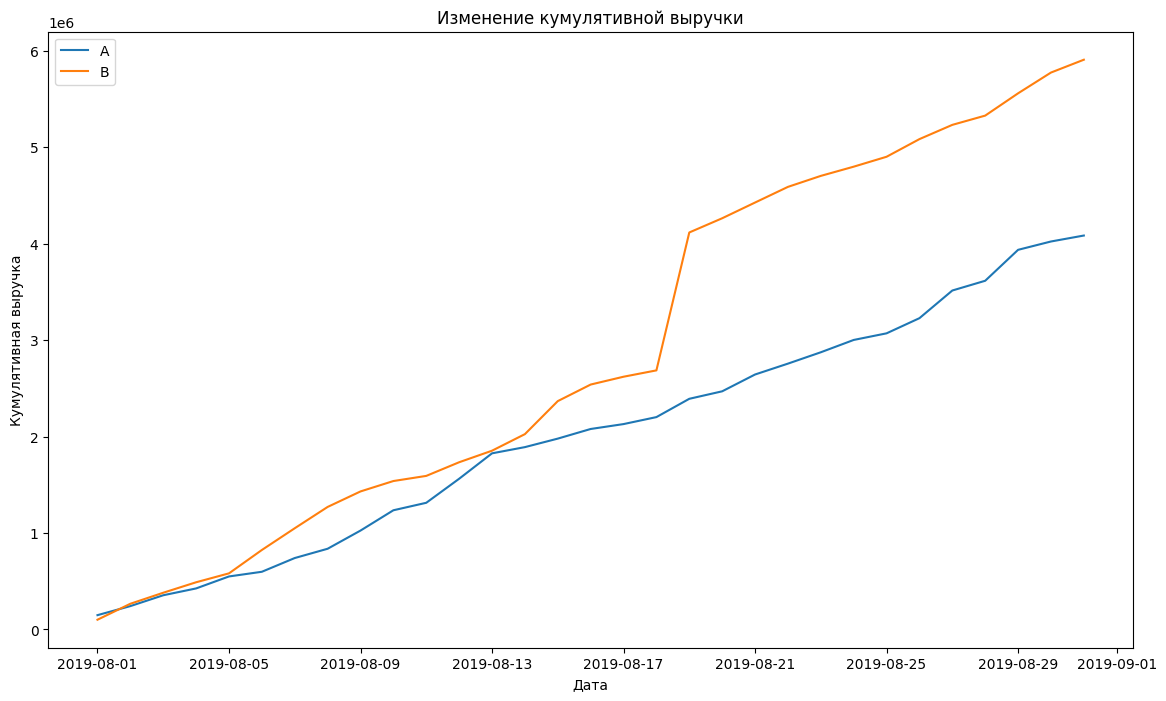

In [30]:
plt.figure(figsize=(14,8))
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('Изменение кумулятивной выручки')
plt.show()

Выручка равномерно увеличивается в течение всего теста. Примечательно, что в группе B график резко вырос в одной точке. Это может свидетельствовать о какой-либо аномалии.

Построим график кумулятивного среднего чека

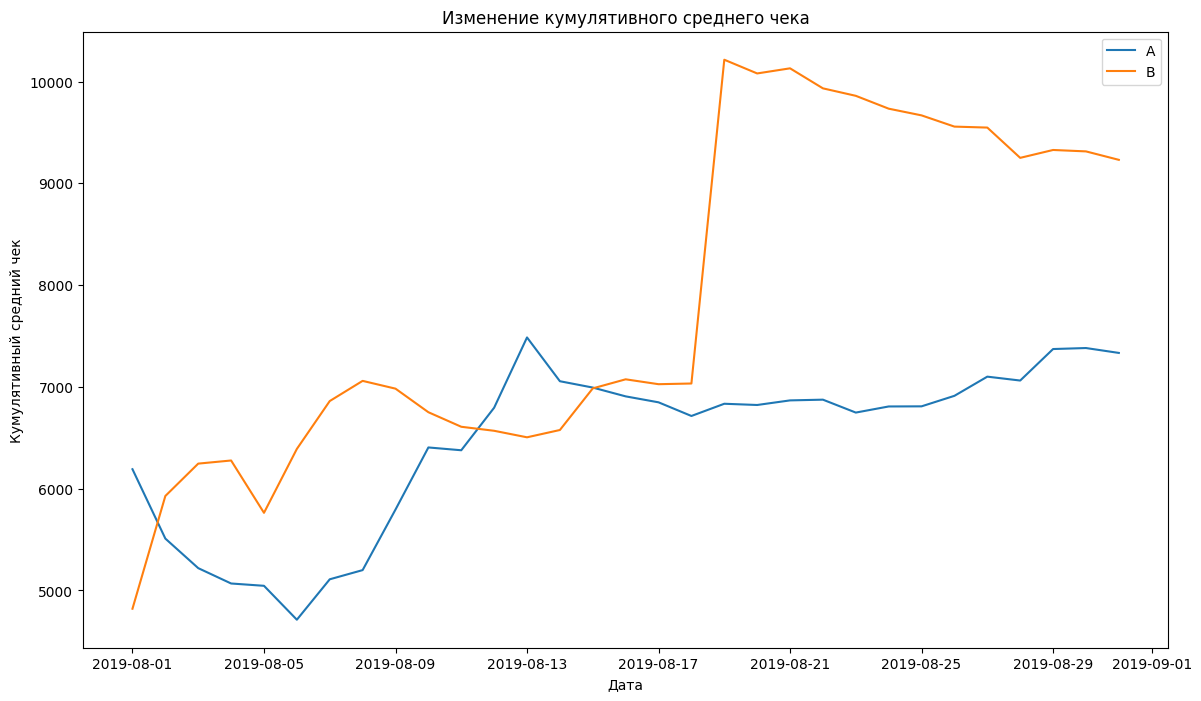

In [31]:
plt.figure(figsize=(14,8))
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
# делим среднюю выручку на число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('Изменение кумулятивного среднего чека')
plt.show()

Средний чек активно рос и ближе к концу наблюдений стабилизировался. В группе B он падает после резкого роста, а в группе A установился на одном уровне. Резкий подъем может говорить о том, что в период 17-21 августа были дорогие заказы.

Построим график относительного изменения кумулятивного среднего чека группы B к группе A

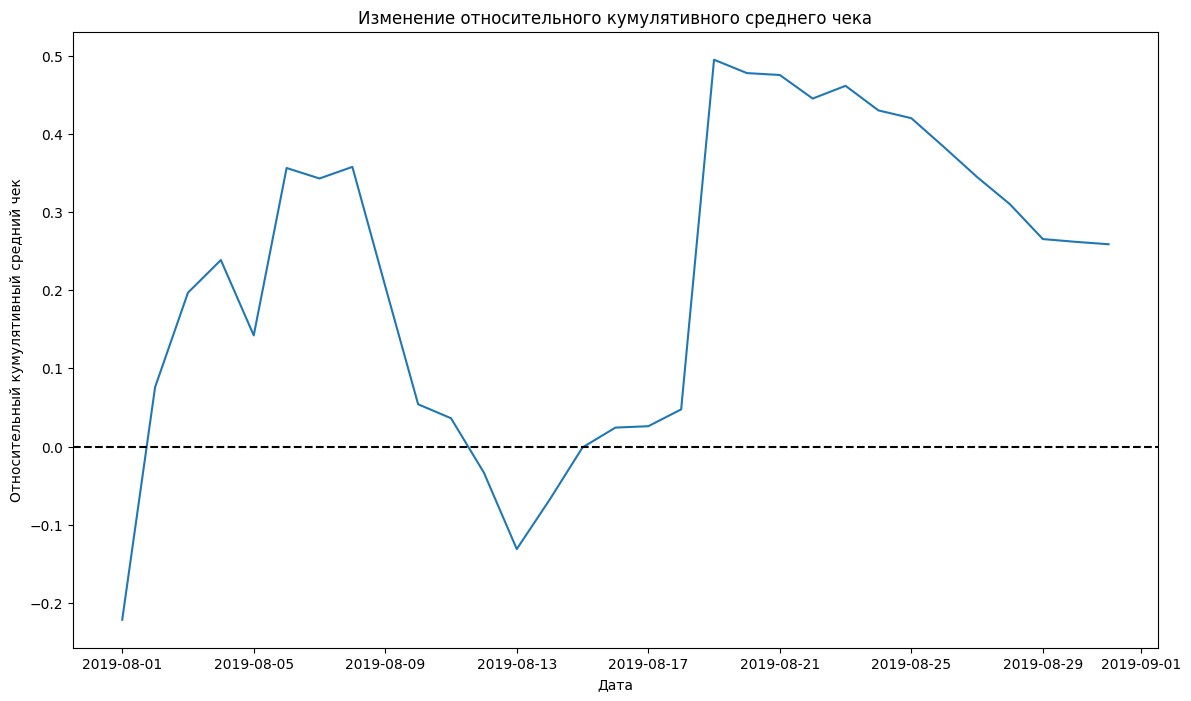

In [32]:
plt.figure(figsize=(14,8))
plt.xlabel('Дата')
plt.ylabel('Относительный кумулятивный средний чек')
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB,
                                                   left_on='date',
                                                   right_on='date',
                                                   how='left',
                                                   suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB']) /
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.title('Изменение относительного кумулятивного среднего чека')
plt.show()

Из графика видно, что большую часть времени график различия между группами скачет, выравниваясь только к концу. Вероятнее всего, причина этому - выбросы и дорогие заказы.

Построим график кумулятивного среднего количества заказов на посетителя по группам

In [33]:
cumulativeData['meanOrders'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

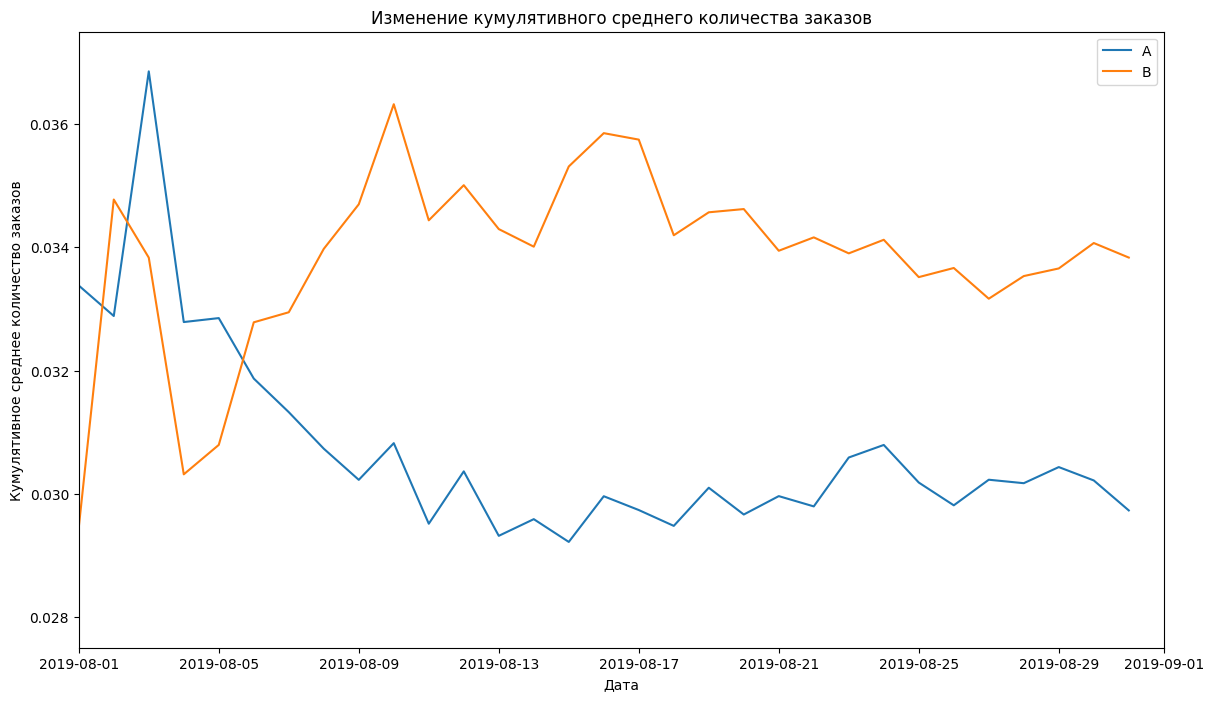

In [34]:
plt.figure(figsize=(14,8))
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количество заказов')
plt.plot(cumulativeDataA['date'], cumulativeDataA['meanOrders'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['meanOrders'], label='B')
plt.legend()
plt.title('Изменение кумулятивного среднего количества заказов')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.0275, 0.0375])
plt.show()

Из графика видно, что среднее количество заказов еще не установилось, однако к концу наблюдений отметился тренд на выравнивание. Среднее количество заказов группы A поначалу было выше, но затем сильно снизилось и несильно колебалось возле значения 0.03.

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

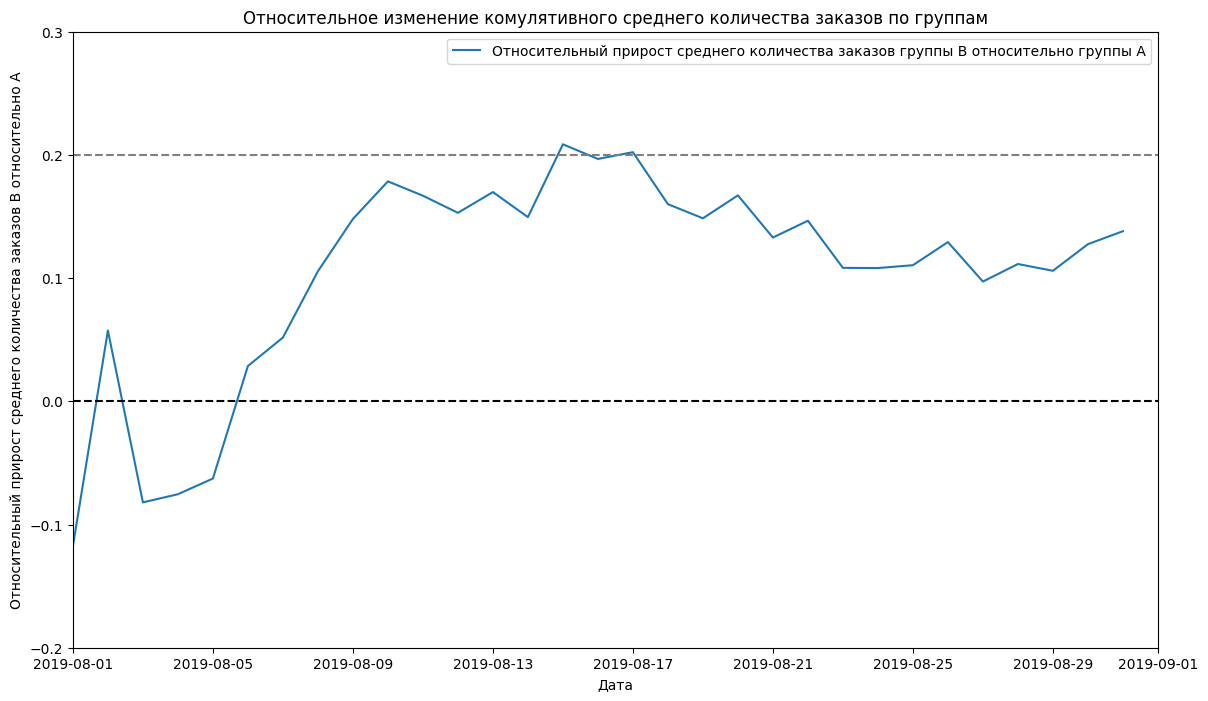

In [35]:
plt.figure(figsize=(14,8))
plt.xlabel('Дата')
plt.ylabel('Относительный прирост среднего количества заказов B относительно A')

mergedCumulativeConversions = cumulativeDataA[['date','meanOrders']].merge(cumulativeDataB[['date','meanOrders']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['meanOrdersB']/mergedCumulativeConversions['meanOrdersA']-1, label="Относительный прирост среднего количества заказов группы B относительно группы A")
plt.legend()
plt.title('Относительное изменение комулятивного среднего количества заказов по группам')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.2, 0.3])
plt.show()

Из графика видно, что в начале теста группа B проигрывала A, затем был резкий скачок и падение. После среднее количество заказов на пользователя группы B по отношению к A начало стремительно расти и среднее количество заказов B стало выигрывать у A. К концу наблюдений среднее количество заказов на пользователя группы B зафиксировалось около прироста 10-15% относительно среднего количества заказов A.

На данном этапе нельзя точно сделать выводы по тесту, поскольку в данных имеются аномалии и выбросы.

Построим точечный график количества заказов по пользователям

In [36]:
ordersByVisitors = (
    orders.groupby(['visitorId', 'group'], as_index=False)
    .agg({'transactionId': 'count'})
)
ordersByVisitors.columns = ['visitorId', 'group', 'orders_count']
ordersByVisitors

,visitorId,group,orders_count
0,5114589,B,1
1,6958315,B,1
2,8300375,A,1
3,8300375,B,1
4,11685486,A,1
...,...,...,...
1084,4266935830,B,1
1085,4278982564,A,1
1086,4279090005,B,1
1087,4281247801,B,1


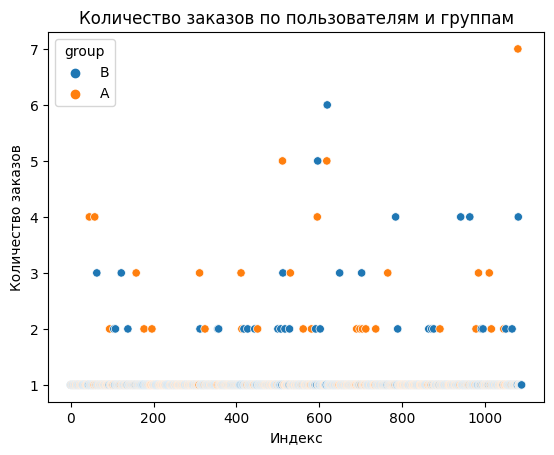

In [37]:
sns.scatterplot(data=ordersByVisitors, x=ordersByVisitors.index, y=ordersByVisitors['orders_count'], hue='group')
plt.title('Количество заказов по пользователям и группам')
plt.ylabel('Количество заказов')
plt.xlabel('Индекс')
plt.show()

В основном пользователи совершали по одной покупке. Однако из графика видно, что некоторые совершали 3 и более покупок. Например, покупатель из группы A совершил 7 покупок. Возможно, благодаря таким выбросам мы увидели пики ранее на графиках.

Посчитаем перцентили количества заказов на пользователя

In [38]:
print(np.percentile(ordersByVisitors['orders_count'], [95, 99]))

[2. 4.]


Делаем вывод, что было не более 5% покупателей, совершивших 2 покупки и больше, и не более 1%, совершивших 4 покупки и больше. Выберем за нижнюю границу число заказов, равное 2.

Построим точечный график стоимостей заказов

In [39]:
x_values = pd.Series(range(0, len(orders['revenue'])))

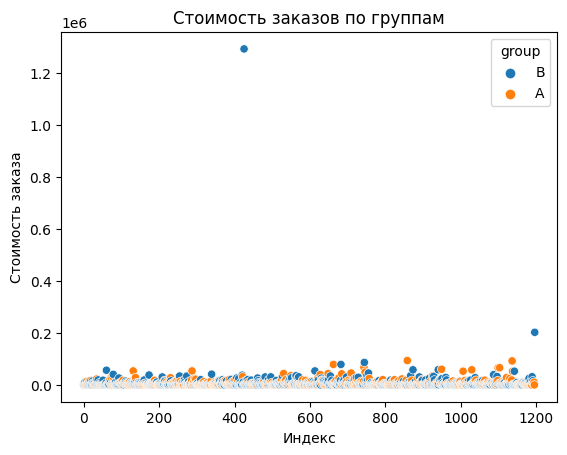

In [40]:
sns.scatterplot(data=orders, x=x_values, y=orders['revenue'], hue='group')
plt.title('Cтоимость заказов по группам')
plt.ylabel('Стоимость заказа')
plt.xlabel('Индекс')
plt.show()

Один заказ из группы B имеет аномальное значение стоимости (выше 1 200 000). Вероятнее всего, этот заказ влияет на всплески на графике среднего чека.

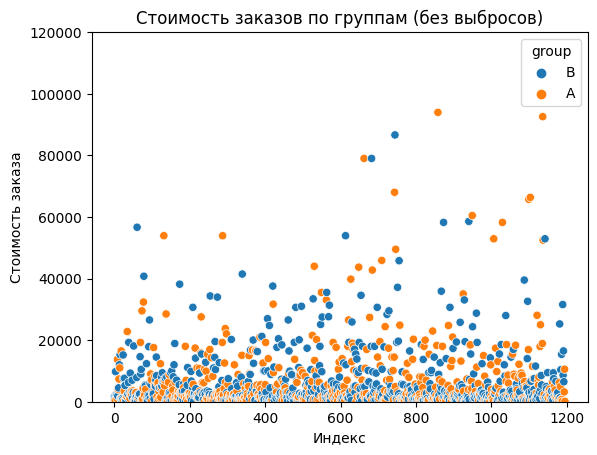

In [41]:
sns.scatterplot(data=orders, x=x_values, y=orders['revenue'], hue='group')
plt.title('Cтоимость заказов по группам (без выбросов)')
plt.ylabel('Стоимость заказа')
plt.xlabel('Индекс')
plt.ylim(0,120000)
plt.show()

Из графика видно, что чаще всего заказы не превышают 30 000. Также присутствует небольшое количество дорогих заказов (более 50 000).

Посчитаем перцентили стоимости заказов

In [42]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Было не более 5% заказов ценой больше 28 000 и не более 1% заказов ценой больше 58 000. За нижнюю границу возьмем 28 000.

### Статистическая значимость

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [43]:
# считаем число визитов по группам и дням

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [44]:
# считаем число заказов по группам и дням

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [45]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [46]:
# число пользователей, совершавших заказ хотя бы 1 раз

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

In [47]:
# объявляем переменные, в которых пользователям из разных групп будет соответствовать количество заказов
# тем, кто ничего не заказал, будут соответствовать нули

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

0-гипотеза - статистически значимых различий в среднем количестве заказов по "сырым" данным между группами нет

Альтернативная гипотеза - между группами имеются статистически значимые различия в среднем количестве заказов по "сырым" данным

### Проверим критерием Манна-Уитни

In [48]:
print("p-значение: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Различие: {0:.3f}'.format(sampleB.mean()/sampleA.mean()-1))

p-значение: 0.017
Различие: 0.138


Первое число: p-value < 0.05, следовательно, нулевая гипотеза может быть отвергнута. Таким образом, различия в среднем количестве заказов статистически значимы и относительный выигрыш группы B=13.8%. По сырым данным можно сказать, что, вероятнее всего, различие по среднему количеству заказов есть.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза - статистически значимых различий в среднем чеке по "сырым" данным между группами нет

Альтернативная гипотеза - между группами имеются статистически значимые различия в среднем чеке по "сырым" данным

In [49]:
print('p-значение: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]))

print('Различие: {0:.3f}'.format(orders[orders['group'] == 'B']['revenue'].mean()/orders[orders['group'] == 'A']['revenue'].mean()-1))

p-значение: 0.729
Различие: 0.259


p-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом средний чек группы B значительно выше среднего чека A.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Узнаем число аномальных пользователей

Нулевая гипотеза - статистически значимых различий между средним количеством заказов на посетителя в "очищенных" группах нет

Альтернативная гипотеза - различия в среднем количестве заказов по "очищенным" данным статистически значимы

In [50]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.shape)

(74,)


Имеется 74 аномальных пользователя

In [51]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-значение: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Различие: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-значение: 0.013
Различие: 0.173


По сравнению с "сырыми" данными, результаты изменились несильно (увеличилось проимущество группы B), на очищенных данных различия в среднем количестве заказов на пользователя также статистически значимы (группа B выигрывает)

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Нулевая гипотеза - статистически значимых различий в среднем чеке по "отфильтрованным" данным между группами нет

Альтернативная гипотеза - между группами имеются статистически значимые различия в среднем чеке по "отфильтрованным" данным

In [52]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738
-0.020


p-value увеличился, а разница между группами на очищенных данных практически отсутствует (1.7%, B проигрывает)

Выводы

- Различия в среднем количестве заказов на пользователя статистически значимы и по "сырым" и по "очищенным" данным, при этом группа B показывает лучшие результаты по сравнению с A
- Нет статистически значимого различия по среднему чеку между группами ни по "сырым" данным, ни по данным после фильтрации аномалий, при этом по "очищенным" данным группа B незначительно проигрывает A. Скорее всего, пик на графике "сырых" данных исказил общую картину
- График различия среднего количестве заказов на пользователя между группами сообщает, что результаты группы B лучше группы A и имеют достаточно стабильный рост
- График различия среднего чека говорит о том, что результаты группы B лучше A, однако это во многом благодаря выбросам

Исходя из этих фактов, тест следует завершить и признать успешной альтернатиную гипотезу. В результате теста мы добились улучшения показателей среднего количества заказов на пользователя, хоть между группами и нет статистически значимого различия по среднему чеку.

# Общий вывод

Проведена приоритизация гипотез по фреймворкам ICE и RICE. Затем анализ
результатов A/B-теста, построилf графики кумулятивной выручки, среднего чека,
конверсии по группам, а затем посчитал статистическую значимость различий конверсий
и средних чеков по сырым и очищенным данным.

На основании анализа мной было принято решение о нецелесообразности дальнейшего проведения теста.